# GIK2KM - Lab 4 - Text Mining

## Task1: Sentiment Analysis using polarity

In [1]:
import spacy
import os

# Try to load the module
try:
    nlp = spacy.load("en_core_web_sm")
    print("Module 'en_core_web_sm' is loaded.")
except OSError:
    print("Module 'en_core_web_sm' is not installed. Installing now...")
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")
    print("If the module still couldn't be loaded, but the installation was succesful, try to restart the kernel.")

Module 'en_core_web_sm' is loaded.


In [2]:
import nltk
import pandas as pd

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Read data to dataframe
df_t1 = pd.read_csv('amazon_alexa.tsv', sep='\t')

# Convert reviews to strings
df_t1['reviews'] = df_t1['verified_reviews'].astype(str)

df_t1.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,rating,date,variation,verified_reviews,feedback,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [3]:
import contractions

# Remove contractions function
def remove_contractions(text):
    return contractions.fix(text)

# Remove contractions
df_t1['reviews'] = df_t1['reviews'].apply(remove_contractions)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"Sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing. My 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [4]:
import re

# Remove special characters function
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

# Remove special characters
df_t1['reviews'] = df_t1['reviews'].apply(remove_special_characters)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [5]:
from nltk.tokenize import word_tokenize

# Tokenize function
def tokenize(text):
    return word_tokenize(text)

# Tokenize
df_t1['reviews_tokenized'] = df_t1['reviews'].apply(tokenize)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews,reviews_tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[Love, my, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,"[Loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[Sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[I, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[Music]


In [6]:
# Lowercase function
def lowercase(tokens):
    return [word.lower() for word in tokens]

# Lowercase
df_t1['reviews_tokenized'] = df_t1['reviews_tokenized'].apply(lowercase)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews,reviews_tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[music]


In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords function
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Remove stopwords
df_t1['reviews_tokenized'] = df_t1['reviews_tokenized'].apply(remove_stopwords)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews,reviews_tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[music]


In [8]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize function
def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Lemmatize
df_t1['reviews_tokenized'] = df_t1['reviews_tokenized'].apply(lemmatize)

df_t1.head()

,rating,date,variation,verified_reviews,feedback,reviews,reviews_tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[music]


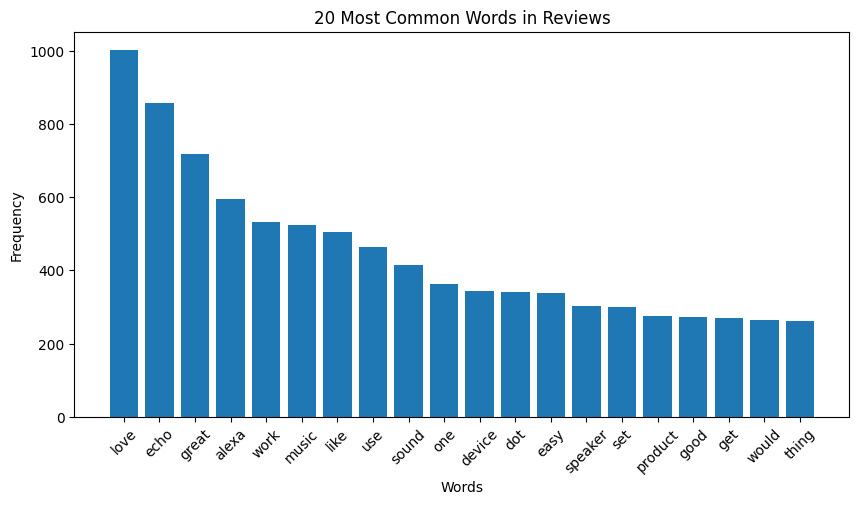

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Join the tokens back into strings
df_t1['reviews_cleaned'] = df_t1['reviews_tokenized'].apply(lambda tokens: ' '.join(tokens))

# Create the CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(df_t1['reviews_cleaned'])

# Count the sum of each word
sum_words = X.sum(axis=0)

# Create a (word, frequency) list and sort it in descending order
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Get the 20 most common words
common_words = words_freq[:20]

# Separate words and counts
words, counts = zip(*common_words)

# Plot word frequencies
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
from textblob import TextBlob

# Calculate the polarity
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity # type: ignore
    print(pol)
    if(pol==0):
        return "Neutral"
    elif(pol>0.1 and pol<=1):
        return "Positive"
    elif(pol>-1 and pol<=-0.1):
        return "Negative"
    
df_t1['polarity'] = df_t1['reviews_cleaned'].apply(get_polarity)

0.5
0.7
0.0
0.2333333333333333
0.0
0.29464285714285715
0.22000000000000003
0.30000000000000004
0.8
0.65
0.05
0.3333333333333333
0.00416666666666667
0.5
-0.1
-0.15000000000000002
0.6777777777777777
0.1431818181818182
0.178125
0.22314814814814815
0.26607142857142857
0.24727272727272726
0.5071428571428571
0.45
0.12000000000000002
0.6000000000000001
0.4
0.5666666666666668
0.16944444444444443
0.0
0.30999999999999994
0.0
0.5305555555555556
0.2729166666666667
1.0
0.21428571428571427
0.6
0.5
0.35
0.38311688311688313
0.5
0.25
0.39999999999999997
0.21428571428571427
0.8
0.45
0.43333333333333335
0.4
0.35
0.0
0.0
0.45
0.55
0.35
0.5
0.0
0.43333333333333335
0.5444444444444445
0.5
0.6
0.0
0.45833333333333337
0.2
0.5
0.42000000000000004
0.43333333333333335
0.3071428571428571
0.0
-0.1
0.6
0.31250000000000006
0.6000000000000001
0.5
0.0
0.0
1.0
0.30625
0.7999999999999999
0.0
0.5
0.19147727272727275
0.0
0.9
0.35
0.4166666666666667
0.0
0.10000000000000002
0.4666666666666666
0.5
0.8
0.5666666666666668
0.55


polarity
Positive    2417
Neutral      433
Negative     112
Name: count, dtype: int64


<Axes: ylabel='count'>

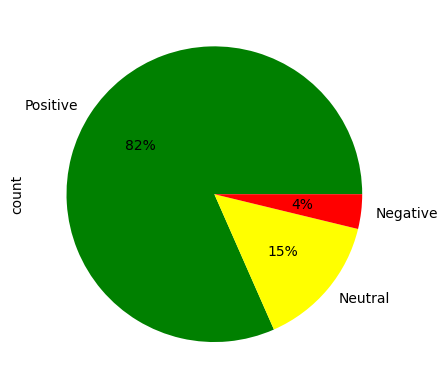

In [11]:
print(df_t1['polarity'].value_counts())
df_t1['polarity'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "yellow", "red"])

### Notes

* Best results was achieved when removing stopwords before lemmatizing the reviews. If lemmatizing first lots of junk words like "wa" ended up in the top list due to the lemmatizer converting "was" to "wa".

* Removal of contractions was also needed because otherwise words like isn't was split into "is" and "n't" and thus "n't" which isn't in the stop word dictionary wasn't cleaned.

## Task2: Text classification using Randomforest

In [12]:
import pandas as pd
import nltk
import spacy

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read data to dataframe
df_t2 = pd.read_csv('moviereviews.tsv', sep='\t')

# Convert reviews to strings
df_t2['review'] = df_t2['review'].astype(str)

df_t2.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [13]:
import contractions

# Remove contractions function
def remove_contractions(text):
    return contractions.fix(text)

# Remove contractions
df_t2['review_str'] = df_t2['review'].apply(remove_contractions)

df_t2.head()

,label,review,review_str
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...


In [14]:
import re

# Remove special characters function
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]+', '', text)

# Remove special characters
df_t2['review_str'] = df_t2['review_str'].apply(remove_special_characters)

df_t2.head()

,label,review,review_str
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...


In [15]:
from nltk.tokenize import word_tokenize

# Tokenize function
def tokenize(text):
    return word_tokenize(text)

# Tokenize
df_t2['review_tokenized'] = df_t2['review_str'].apply(tokenize)

df_t2.head()

,label,review,review_str,review_tokenized
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...,"[how, do, films, like, mouse, hunt, get, into,..."
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...,"[some, talented, actresses, are, blessed, with..."
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...,"[this, has, been, an, extraordinary, year, for..."
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...,"[according, to, hollywood, movies, made, in, l..."
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...,"[my, first, press, screening, of, 1998, and, a..."


In [16]:
# Lowercase function
def lowercase(tokens):
    return [word.lower() for word in tokens]

# Lowercase
df_t2['review_tokenized'] = df_t2['review_tokenized'].apply(lowercase)

df_t2.head()

,label,review,review_str,review_tokenized
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...,"[how, do, films, like, mouse, hunt, get, into,..."
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...,"[some, talented, actresses, are, blessed, with..."
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...,"[this, has, been, an, extraordinary, year, for..."
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...,"[according, to, hollywood, movies, made, in, l..."
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...,"[my, first, press, screening, of, 1998, and, a..."


In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords function
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Remove stopwords
df_t2['review_tokenized'] = df_t2['review_tokenized'].apply(remove_stopwords)

df_t2.head()

,label,review,review_str,review_tokenized
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...,"[films, like, mouse, hunt, get, theatres, law,..."
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...,"[talented, actresses, blessed, demonstrated, w..."
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...,"[extraordinary, year, australian, films, shine..."
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...,"[according, hollywood, movies, made, last, dec..."
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...,"[first, press, screening, 1998, already, gotte..."


In [18]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize function
def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Lemmatize
df_t2['review_tokenized'] = df_t2['review_tokenized'].apply(lemmatize)

df_t2.head()

,label,review,review_str,review_tokenized
0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...,"[film, like, mouse, hunt, get, theatre, law, s..."
1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...,"[talented, actress, blessed, demonstrated, wid..."
2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...,"[extraordinary, year, australian, film, shine,..."
3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...,"[according, hollywood, movie, made, last, deca..."
4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...,"[first, press, screening, 1998, already, gotte..."


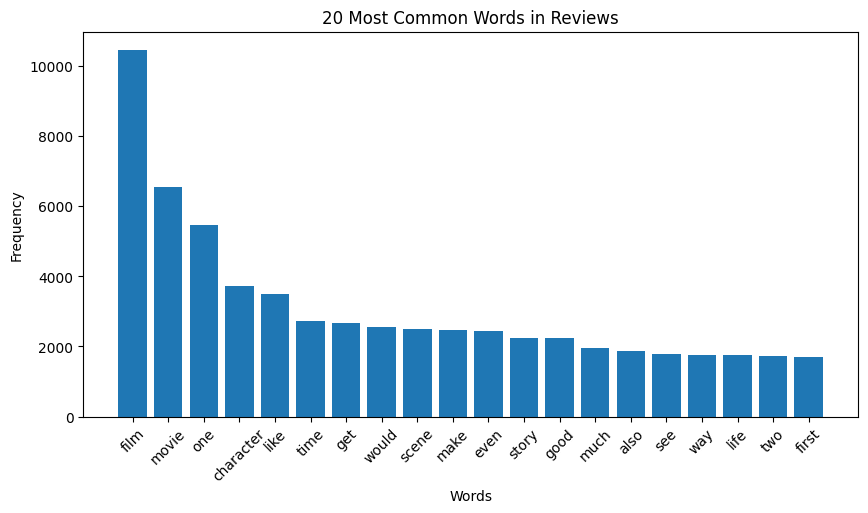

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Join the tokens back into strings
df_t2['review_cleaned'] = df_t2['review_tokenized'].apply(lambda tokens: ' '.join(tokens))

# Create the CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(df_t2['review_cleaned'])

# Count the sum of each word
sum_words = X.sum(axis=0)

# Create a (word, frequency) list and sort it in descending order
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Get the 20 most common words
common_words = words_freq[:20]

# Separate words and counts
words, counts = zip(*common_words)

# Plot word frequencies
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing set (70 : 30)
X_train, X_test, y_train, y_test = train_test_split(df_t2['review_cleaned'], df_t2['label'], test_size=0.3)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

text_clf_forest = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Fit the model
text_clf_forest.fit(X_train, y_train)

# Predict the test data
y_pred = text_clf_forest.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.757
